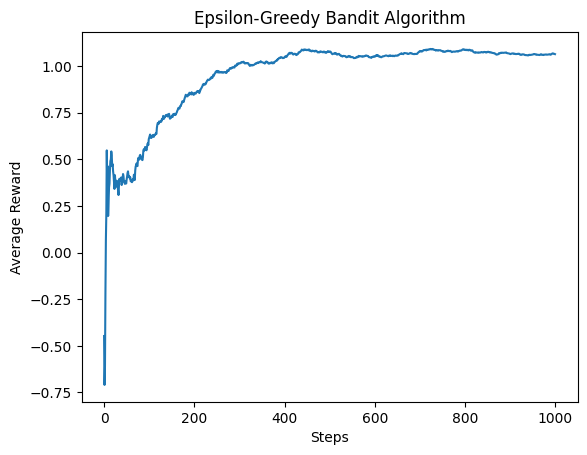

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class Bandit:
    def __init__(self, num_bandits):
        self.num_bandits = num_bandits
        self.true_means = np.random.normal(0, 1, num_bandits)
        self.estimated_means = np.zeros(num_bandits)
        self.action_counts = np.zeros(num_bandits)

    def pull_bandit(self, bandit_index):
        true_reward = np.random.normal(self.true_means[bandit_index], 1)
        return true_reward

    def epsilon_greedy(self, epsilon):
        if np.random.rand() < epsilon:
            # Explore: Choose a random bandit
            action = np.random.choice(self.num_bandits)
        else:
            # Exploit: Choose the bandit with the highest estimated mean
            action = np.argmax(self.estimated_means)

        reward = self.pull_bandit(action)

        # Update estimated mean and action count
        self.action_counts[action] += 1
        self.estimated_means[action] += (reward - self.estimated_means[action]) / self.action_counts[action]

        return reward

def run_bandit_experiment(num_bandits, num_steps, epsilon):
    bandit = Bandit(num_bandits)
    cumulative_rewards = np.zeros(num_steps)

    for step in range(num_steps):
        reward = bandit.epsilon_greedy(epsilon)
        cumulative_rewards[step] = reward

    return cumulative_rewards

def main():
    num_bandits = 10
    num_steps = 1000
    epsilon = 0.1

    cumulative_rewards = run_bandit_experiment(num_bandits, num_steps, epsilon)

    # Plot results
    plt.plot(np.cumsum(cumulative_rewards) / np.arange(1, num_steps + 1))
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Epsilon-Greedy Bandit Algorithm')
    plt.show()

if __name__ == "__main__":
    main()


Sure, let me explain the code and provide a high-level algorithm for the epsilon-greedy single-armed bandit problem:

### Code Explanation:

1. **Bandit Class:**
   - Represents the bandit environment with a specified number of bandits.
   - Initializes true means for each bandit and maintains estimated means and action counts.

2. **pull_bandit Method:**
   - Simulates pulling a bandit, returning a reward sampled from a normal distribution around the true mean of the chosen bandit.

3. **epsilon_greedy Method:**
   - Implements the epsilon-greedy strategy for action selection.
   - With probability `epsilon`, explores by choosing a random bandit.
   - With probability `1 - epsilon`, exploits by choosing the bandit with the highest estimated mean.

4. **run_bandit_experiment Function:**
   - Runs the bandit experiment for a specified number of steps.
   - Records the cumulative rewards obtained at each step.

5. **Main Function:**
   - Sets up the experiment parameters (number of bandits, steps, and epsilon).
   - Calls `run_bandit_experiment` and plots the average reward over time.

### Algorithm:

1. **Initialize:**
   - Create a bandit environment with a specified number of bandits.
   - Initialize estimated means and action counts for each bandit.

2. **For Each Step:**
   - Use the epsilon-greedy strategy to choose an action.
   - Pull the chosen bandit and receive a reward.
   - Update the estimated mean and action count for the chosen bandit.

3. **Repeat for a Number of Steps:**
   - Run the above process for a predefined number of steps.

4. **Cumulative Reward Tracking:**
   - Track the cumulative rewards obtained at each step.

5. **Plot Results:**
   - Visualize the average reward over time to observe the algorithm's performance.

This algorithm balances exploration and exploitation by occasionally choosing random bandits (exploration) and favoring bandits with higher estimated means (exploitation). The code demonstrates how the epsilon-greedy strategy influences the agent's actions over time in a simple single-armed bandit environment.
